Aqui ocorrem:
1. os testes de agrupamento com K-Means, para avaliação da quantidade de grupos a considerar no agrupamento definitivo;

A etapa extra de seleção de atributos não foi executada sobre o conjunto de dados utilizado aqui.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('cursos-ufrpe-pos-processamento.csv',sep=';')

In [4]:
X.shape

(46, 42)

In [5]:
X.columns

Index(['no_cine_area_geral_agricultura,_silvicultura,_pesca_e_veterinaria',
       'no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica',
       'no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao',
       'no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic)',
       'no_cine_area_geral_educacao',
       'no_cine_area_geral_engenharia,_producao_e_construcao',
       'no_cine_area_geral_negocios,_administracao_e_direito',
       'no_cine_area_geral_servicos', 'tp_grau_academico_bacharelado',
       'tp_grau_academico_licenciatura', 'tp_grau_academico_tecnologico',
       'enade_faixa_2', 'enade_faixa_3', 'enade_faixa_4', 'enade_faixa_5',
       'enade_faixa_SC', 'cpc_faixa_3', 'cpc_faixa_4', 'cpc_faixa_5',
       'cpc_faixa_SC', 'qt_vg_total', 'qt_vg_remanesc', 'qt_inscrito_total',
       'qt_insc_vg_remanesc', 'qt_ing_fem', 'qt_ing_masc',
       'qt_ing_outra_forma', 'qt_ing_preta', 'qt_ing_amarela', 'qt_ing_cornd',
       'qt_conc', 'qt_

In [6]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [7]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=100)
    kmeans.fit(X_to_train)
    labels = kmeans.labels_

    # Calcular métricas
    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

# Crie um DataFrame com os resultados
columns = ["Cluster", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
df = pd.DataFrame(results, columns=columns)

In [8]:
df

,Cluster,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,2,0.185819,11.876792,1.439152
1,3,0.189036,11.415716,1.783741
2,4,0.217835,10.952811,1.527131
3,5,0.244393,11.412661,1.393688
4,6,0.235714,10.924228,1.368609
5,7,0.230336,9.905371,1.460253
6,8,0.181161,9.010555,1.524040
7,9,0.185195,8.566280,1.406329
8,10,0.178193,8.023022,1.399694
9,11,0.173715,7.606049,1.427217


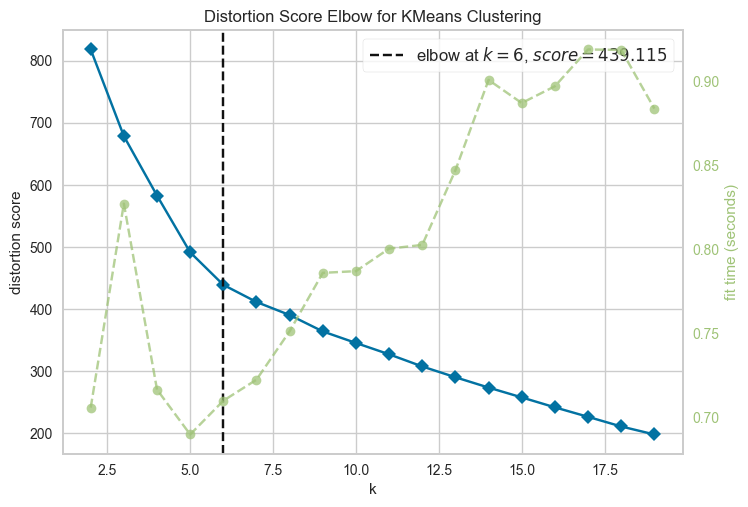

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

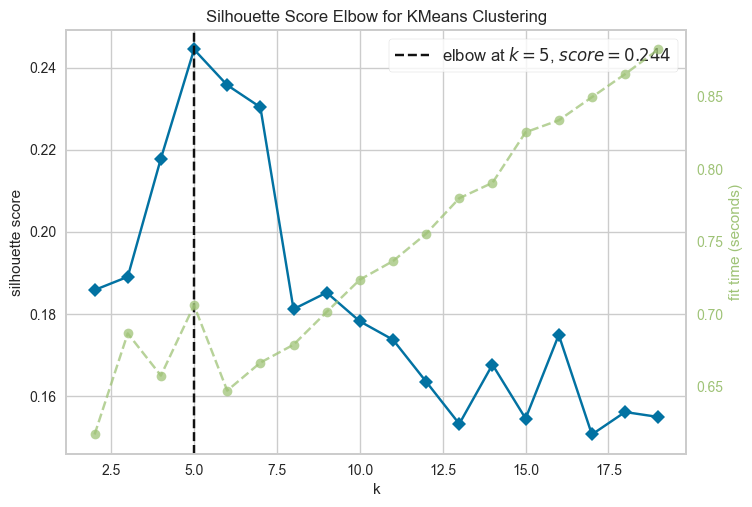

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

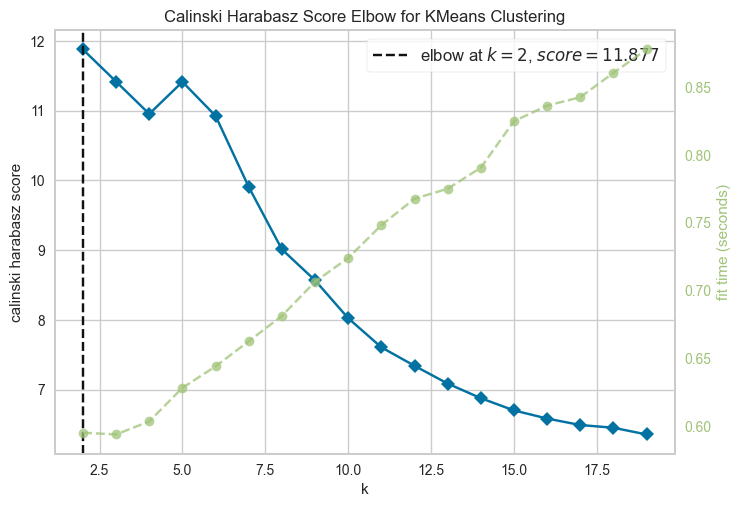

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=100), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=100)
kmeans.fit(X_to_train)

KMeans(n_clusters=5, n_init=100, random_state=42)

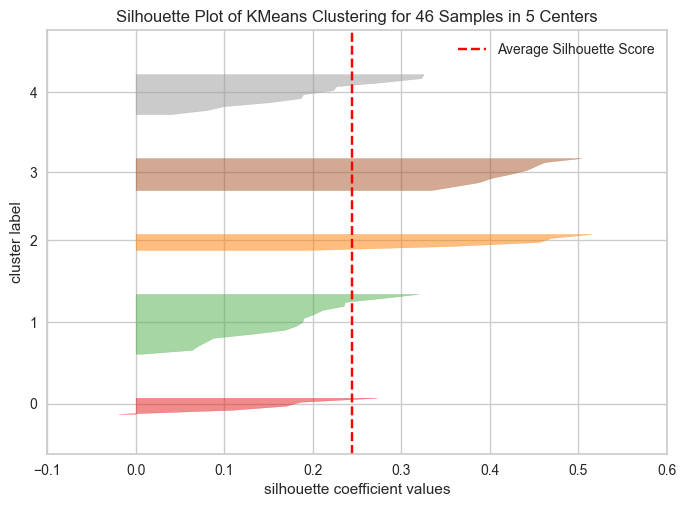

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 46 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X_to_train)
visualizer.show()

In [14]:
X_to_train['label'] = kmeans.labels_

In [15]:
X_to_train['no_curso'] = X['no_curso']

In [16]:
X_to_train

,"no_cine_area_geral_agricultura,_silvicultura,_pesca_e_veterinaria","no_cine_area_geral_ciencias_naturais,_matematica_e_estatistica","no_cine_area_geral_ciencias_sociais,_comunicacao_e_informacao",no_cine_area_geral_computacao_e_tecnologias_da_informacao_e_comunicacao_(tic),no_cine_area_geral_educacao,"no_cine_area_geral_engenharia,_producao_e_construcao","no_cine_area_geral_negocios,_administracao_e_direito",no_cine_area_geral_servicos,tp_grau_academico_bacharelado,tp_grau_academico_licenciatura,tp_grau_academico_tecnologico,enade_faixa_2,enade_faixa_3,enade_faixa_4,enade_faixa_5,enade_faixa_SC,cpc_faixa_3,cpc_faixa_4,cpc_faixa_5,cpc_faixa_SC,qt_vg_total,qt_vg_remanesc,qt_inscrito_total,qt_insc_vg_remanesc,qt_ing_fem,qt_ing_masc,qt_ing_outra_forma,qt_ing_preta,qt_ing_amarela,qt_ing_cornd,qt_conc,qt_ing_deficiente,qt_ing_reserva_vaga,qt_sit_trancada,qt_sit_desvinculado,qt_ing_procescprivada,qt_conc_procescpublica,qt_apoio_social,qt_conc_apoio_social,qt_ativ_extracurricular,label,no_curso
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.198009,-1.515848,-0.860750,-0.839852,-0.949849,0.780188,-0.697633,-0.784481,0.296756,-0.898681,-1.103646,1.103235,1.758524,-0.921816,-1.580111,-1.462235,-0.746779,-1.134240,-0.690891,-0.987975,3,belo_jardim_bacharelado_engenharia_de_computacao
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.198009,-1.515848,-1.048979,-0.839852,-0.792891,0.208583,-0.697633,-0.974408,-0.944223,1.410778,-1.103646,-0.886914,1.758524,-1.107797,-0.854711,-1.131054,-0.746779,-1.134240,-0.690891,-1.085868,3,belo_jardim_bacharelado_engenharia_de_controle...
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.198009,-1.515848,-0.993476,-0.839852,-1.002168,-0.771312,-0.697633,-0.784481,1.537735,-0.436789,-1.103646,-0.886914,1.758524,-0.735836,-1.471301,-1.594707,-0.746779,-1.134240,-0.690891,-1.085868,3,belo_jardim_bacharelado_engenharia_hidrica
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.198009,-1.515848,-1.003128,-0.839852,-0.112742,-0.771312,-0.697633,-1.164335,0.296756,0.025103,-1.103646,-0.886914,1.758524,-1.107797,-1.507571,-1.362881,-0.746779,-1.134240,-0.690891,-0.987975,3,belo_jardim_bacharelado_engenharia_quimica
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.326041,-0.121268,0.176924,0.036101,0.724365,0.698530,1.809486,1.114789,0.296756,-0.436789,-0.283867,-0.886914,1.758524,0.937988,0.197120,-0.700519,0.889023,1.584558,-0.270647,-0.890082,2,cabo_de_santo_agostinho_bacharelado_engenharia...
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.326041,-0.121268,-0.081288,-0.839852,0.619726,1.310964,-0.697633,0.734935,1.537735,2.565508,-0.635201,0.108160,1.758524,0.380047,-0.129311,-0.832991,0.343755,0.354626,0.569842,-0.106938,2,cabo_de_santo_agostinho_bacharelado_engenharia...
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.326041,-0.121268,-0.373285,-0.693860,-0.845210,2.250029,-0.697633,-0.404627,0.296756,1.872670,-0.986535,-0.886914,1.758524,0.566027,-0.310661,-1.296644,-0.201512,0.743025,-0.690891,-0.204831,2,cabo_de_santo_agostinho_bacharelado_engenharia...
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.326041,-0.121268,-0.300889,-0.547867,-0.740572,2.045884,-0.697633,1.114789,0.296756,2.565508,-0.869423,0.108160,1.758524,0.380047,-0.419471,-0.998582,-0.201512,1.649291,-0.270647,-0.498510,2,cabo_de_santo_agostinho_bacharelado_engenharia...
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.326041,-0.121268,-0.291236,-0.693860,-0.688253,2.331687,0.305215,0.734935,-0.944223,2.565508,-0.518090,-0.886914,1.758524,0.008086,-0.056770,-1.263526,0.343755,2.037691,0.149598,-0.498510,2,cabo_de_santo_agostinho_bacharelado_engenharia...
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [17]:
X_to_train.label.value_counts()

1    16
4    11
3     9
2     5
0     5
Name: label, dtype: int64

In [18]:
for i in range(0, 8):
    cursos_cluster_i = list(X_to_train.query('label == @i')['no_curso'])
    print('Cluster', i+1, '-', len(cursos_cluster_i), 'cursos')
    
    for curso in cursos_cluster_i:
        print(curso)
    
    print()

Cluster 1 - 5 cursos
recife_bacharelado_agronomia
recife_licenciatura_ciencias_biologicas
recife_licenciatura_matematica
recife_bacharelado_medicina_veterinaria
recife_licenciatura_quimica

Cluster 2 - 16 cursos
recife_bacharelado_ciencias_biologicas
recife_bacharelado_ciencias_do_consumo
recife_bacharelado_engenharia_agricola_e_ambiental
recife_bacharelado_engenharia_de_pesca
recife_bacharelado_engenharia_florestal
recife_licenciatura_fisica
recife_bacharelado_zootecnia
serra_talhada_bacharelado_administracao
serra_talhada_bacharelado_agronomia
serra_talhada_bacharelado_ciencias_biologicas
serra_talhada_bacharelado_ciencias_economicas
serra_talhada_bacharelado_engenharia_de_pesca
serra_talhada_licenciatura_letras_-_portugues_e_ingles
serra_talhada_licenciatura_quimica
serra_talhada_bacharelado_sistema_de_informacao
serra_talhada_bacharelado_zootecnia

Cluster 3 - 5 cursos
cabo_de_santo_agostinho_bacharelado_engenharia_civil
cabo_de_santo_agostinho_bacharelado_engenharia_de_materiais
c